# Mercedez dataset - handling categorical features with multiple categorical labels

In [1]:
import pandas as pd

In [8]:
df=pd.read_csv(r'C:\Users\Mohit\Downloads\mercedes-benz-greener-manufacturing\train.csv\train.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [9]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [10]:
df.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [62]:
list_top_10=list(df.groupby(['X1'])['X1'].count().sort_values(ascending=False).head(10).index)

In [63]:
list_top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [64]:
import numpy as np

In [65]:
for categories in list_top_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [67]:
type(list_top_10)
list_top_10.append('X1')

In [68]:
df[list_top_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


# Frequent Categories Imputation

In [125]:
housing_df=pd.read_csv(r'C:\Users\Mohit\Desktop\Sample Files\loan_data.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [71]:
housing_df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [126]:
housing_df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [127]:
df_bsmt_original=housing_df['BsmtQual']

In [74]:
housing_df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Identifying the most frequent categorical lables for the feature having less null values

In [99]:
most_frquent_label=housing_df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).index[0]

In [100]:
most_frquent_label

'TA'

In [103]:
housing_df['BsmtQual_modified_Flag']=np.where(housing_df['BsmtQual'].isnull(),1,0)

In [105]:
housing_df['BsmtQual'].fillna(most_frquent_label,inplace=True)

In [106]:
housing_df[housing_df['BsmtQual_modified_Flag']==1]

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_modified_Flag
17,TA,NaN,CarPort,90000,1
39,TA,NaN,NaN,82000,1
90,TA,NaN,Detchd,109900,1
102,TA,NaN,Attchd,118964,1
156,TA,NaN,Detchd,109500,1
182,TA,Gd,Attchd,120000,1
259,TA,NaN,Detchd,97000,1
342,TA,NaN,Detchd,87500,1
362,TA,Ex,BuiltIn,198500,1
371,TA,Gd,Detchd,134432,1


In [108]:
import seaborn as sn

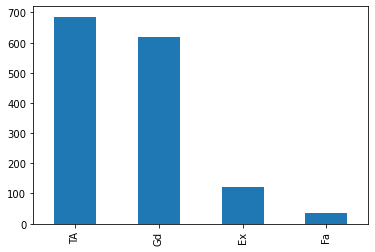

In [124]:
housing_df['BsmtQual'].value_counts().plot.bar()

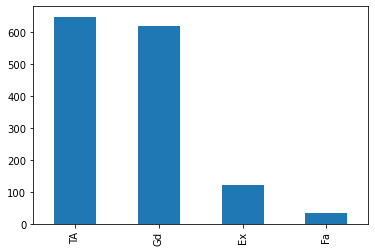

In [129]:
df_bsmt_original.value_counts().plot.bar()